# ripe or rotten mango?

In this section, we reload modules for immediate code updates and append a directory to the system path to simplify module imports.

In [1]:
import sys 
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

This section imports essential libraries for data manipulation and visualization, while also including custom modules for dataset management and image processing.

In [2]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt
from random import sample
from src import get_dataset, preprocess, graphic

warnings.filterwarnings("ignore")
%matplotlib inline

In this section, we initialize the dataset, create a DataFrame named `image_df` from the training data, and display its shape and the first five entries for better organization and analysis.

In [3]:
dataset = get_dataset()
train_set = dataset.train_data

image_df = pd.DataFrame(train_set)
print(image_df.shape)
image_df.head(5)

Loaded dataset ../data/raw\train.csv in 0.02 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
(1989, 2)


,filename,label
0,1.jpg,Ripe
1,10.jpg,Ripe
2,1000.jpg,Ripe
3,102.jpg,Ripe
4,103.jpg,Ripe


We create an instance of `preprocess` with the training dataset, enabling efficient handling of image preprocessing tasks.

In [16]:
processor = preprocess(train_set)
edges_set = processor.edges_data
stats_set = processor.stats_data

Loaded dataset ../data/processed\edges.csv in 10.88 seconds.
Loaded dataset ../data/processed\stats.csv in 8.71 seconds.


After initializing the processor and obtaining the processed images, we organize these images into DataFrames called `edges_df` and `stats_df`, which contain the relevant features for subsequent analysis and modeling, along with descriptive statistics for further insights.

In [17]:
edges_df = pd.DataFrame(edges_set)
print(edges_df.shape)
edges_df.head()

(1989, 4866)


,filename,label,edge_0,edge_1,edge_2,edge_3,edge_4,edge_5,edge_6,edge_7,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
0,1.jpg,1,0,51,123,121,52,12,7,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
1,10.jpg,1,0,111,72,19,13,11,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000.jpg,1,0,56,40,28,25,6,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
3,102.jpg,1,0,1,2,1,38,135,236,207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103.jpg,1,0,5,4,5,5,0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
stats_df = pd.DataFrame(stats_set)
print(stats_df.shape)
stats_df.describe()

(1989, 266)


,label,area,mean_gray,max_gray,min_gray,std_dev_gray,mean_intensity_R,mean_intensity_G,mean_intensity_B,hist_0,...,hist_246,hist_247,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,0.249874,2804.121166,147.545393,206.398693,66.642534,27.753669,178.874628,152.755324,125.420533,0.018100,...,1.877828,2.298643,2.099045,2.134238,2.536450,4.264454,4.192056,7.790347,23.871795,64.635495
std,0.433049,1783.202419,38.034531,40.357712,39.541072,11.419562,34.793060,39.715573,46.457428,0.701159,...,14.196652,19.272542,11.330358,12.475553,11.018062,35.418686,29.460001,44.027678,117.936258,344.234783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1539.000000,119.930928,177.000000,29.000000,20.168003,150.516357,127.486199,88.112769,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2672.000000,143.958671,206.000000,70.000000,26.480516,174.219409,148.781897,127.779785,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4065.000000,167.345860,250.000000,97.000000,33.065979,202.717976,175.800995,148.849899,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19064.000000,252.266754,255.000000,176.000000,101.055420,253.466627,252.542050,251.402760,31.000000,...,388.000000,571.000000,268.000000,463.000000,215.000000,1023.000000,1124.000000,1219.000000,3021.000000,3233.000000


The `show_samples` function visualizes a selection of images from the training dataset, displaying the original images alongside their corresponding edge-detected versions. It also generates histograms for the edge images, providing insights into their color distributions. This function helps evaluate the training data and edge detection outcomes effectively.

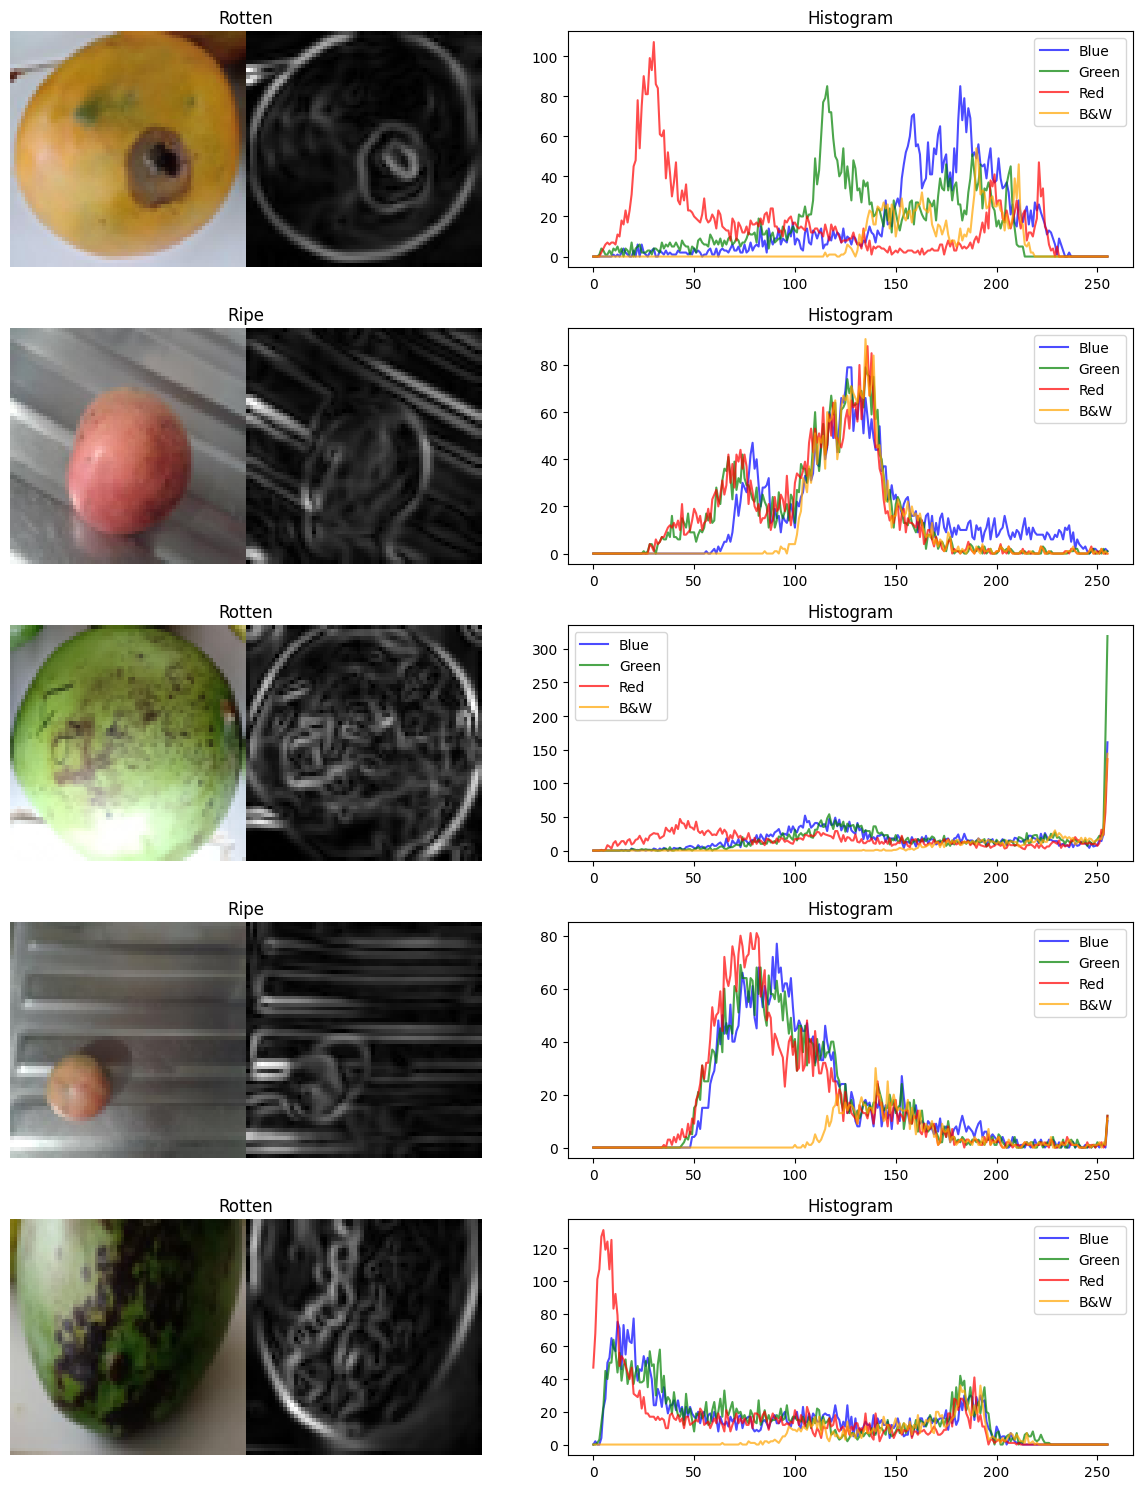

In [ ]:
def show_samples(train_set, edges_set, stats_set, num_samples=5):
    num_samples = min(num_samples, len(edges_set))

    indices = sample(range(len(train_set)), num_samples)
    selected_images = [(train_set[i], edges_set[i], stats_set[i]) for i in indices]

    _, axes = plt.subplots(num_samples, 2, figsize=(12, 3 * num_samples))

    for ax, (train_img, edges_img, stats_img) in zip(axes[:, 0], selected_images):
        ax.set_title(train_img["label"])
        orig_img = graphic.load_orig_img("train", train_img)
        proc_img = graphic.load_proc_img(edges_img)

        combined_img = graphic.combine_images(orig_img, proc_img)
        ax.imshow(combined_img)
        ax.axis("off")

    for ax, (train_img, edges_img, stats_img) in zip(axes[:, 1], selected_images):
        ax.set_title("Histogram")
        bins, colors, histograms = graphic.load_all_hists(edges_img, stats_img)

        for color, hist in zip(colors, histograms):
            label = f"{color.capitalize()}" if color != "orange" else "B&W"
            ax.plot(bins, hist, color=color, label=label, alpha=0.7)

        ax.legend()
        ax.axis("tight")

    plt.tight_layout()
    plt.show()


show_samples(train_set, edges_set, stats_set)